In [1]:
import pandas as pd

%load_ext autoreload
%autoreload 2

folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
csv_folder = '{}/csvs_for_paper'.format(folder)
bed_folder = '{}/bed'.format(folder)


splicing_feature_folder = '{}/splicing_feature_data'.format(csv_folder)
alternative_feature_folder = '{}/alternative'.format(splicing_feature_folder)
constitutive_feature_folder = '{}/constitutive'.format(splicing_feature_folder)

alt_exons_bedfile = '{}/exons.bed'.format(alternative_feature_folder)
constitutive_bedfile = '{}/exons.bed'.format(constitutive_feature_folder)

bedfiles = alt_exons_bedfile, constitutive_bedfile

# splicing_feature_data = pd.read_csv('{}/splicing_feature_data.csv'.format(csv_folder), index_col=0)
# print(splicing_feature_data.shape)
# splicing_feature_data.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


In [2]:
import pybedtools
constitutive_bed = pybedtools.BedTool(constitutive_bedfile)
names = [x.name for x in constitutive_bed]

constitutive_feature_data = pd.DataFrame(index=names)

In [3]:
len(constitutive_bed)

5893

In [4]:
hg19_fasta = '/projects/ps-yeolab/genomes/hg19/gencode/v19/GRCh37.p13.genome.fa'

## Splice site strength

In [5]:
from poshsplice.splicestrength import score_exons


constitutive_scores = score_exons(constitutive_bedfile, 'hg19', hg19_fasta)
constitutive_scores.head(10)

,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq
exon:chr10:102039881-102039985:-,8.01,GTTTTTCTTTGTTTTTAAAGATG,3.95,TGGGTAACC
exon:chr10:102040691-102040810:-,5.71,TCTTCTGTTTAATTTTCAAGCCA,8.62,AATGTAAGT
exon:chr10:102045854-102045970:-,5.19,GTCATTCTCCCTTGGCCCAGACG,8.48,CGGGTGAGG
exon:chr10:102286732-102286831:-,9.47,AAGTTCTTGCTGTCTTTCAGGTA,10.10,CCGGTAAGA
exon:chr10:102289123-102289263:-,8.05,TGTTCTCTTCTGCGTTCTAGCCT,7.47,AGGGTATGC
exon:chr10:102289137-102289263:-,8.05,TGTTCTCTTCTGCGTTCTAGCCT,4.74,GGGGTGAGA
exon:chr10:103360495-103360619:+,9.37,ATGCTTGCTTCTCTCCCCAGTGA,6.58,AATGTACGT
exon:chr10:103360960-103361093:+,5.05,GTTGGATTTGCCTTCTGCAGCCT,7.97,GAAGTGAGT
exon:chr10:103558599-103559212:-,9.44,ACATTTATTTATTTTTGTAGGTA,8.40,AAAGTGAGT
exon:chr10:103563492-103563776:-,10.17,ACGGTTGTCGTTATTTCTAGGTC,8.82,TGAGTAAGT


In [6]:
constitutive_scores.shape

(5893, 4)

In [7]:
ls $csv_folder/constitutive*

/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/constitutive_downstream400_pyrimidine_content.csv
/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/constitutive_exons.bed
/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/constitutive_feature_data.csv
/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/constitutive_upstream400_pyrimidine_content.csv


### Write constitutive data

In [8]:
constitutive_scores.to_csv('{}/maxentscan.csv'.format(constitutive_feature_folder))

## Alternative scores

In [9]:
from poshsplice.splicestrength import score_exons

alt_exons_scores = score_exons(alt_exons_bedfile, 'hg19', hg19_fasta)
alt_exons_scores.head()

,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq
exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,7.84,TCTGTGTGCTGCTTCTTCAGTGC,10.28,CAGGTAGGT
exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102003455-102003534:-@exon:chr10:101997940-101997988:-,6.56,GTCTCTCAAATATGTTGTAGAAA,9.06,AAGGTAAAG
exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,8.47,ATGTCTGTTTCCCTCACTAGCTC,8.84,TGGGTAAGC
exon:chr10:102021736-102021820:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,8.47,ATGTCTGTTTCCCTCACTAGCTC,8.84,TGGGTAAGC
exon:chr10:102021736-102021820:-@exon:chr10:102020723-102020785:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,7.14,TTAGCTGCTGTTGTGTGTAGGAA,7.98,AAGGTATAG


In [20]:
! wc -l $alt_exons_bedfile

43903 /projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/splicing_feature_data/alternative/exons.bed


In [10]:
alt_exons_scores.shape

(43903, 4)

In [11]:
alt_exons_scores.to_csv('{}/maxentscan.csv'.format(alternative_feature_folder))

##  Compare alt and constitutve

In [12]:
alt_exons_scores['exon_type'] = 'alternative'
constitutive_scores['exon_type'] = 'constitutive'


splice_site_scores = pd.concat([alt_exons_scores, constitutive_scores])
splice_site_scores.head()

,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq,exon_type
exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,7.84,TCTGTGTGCTGCTTCTTCAGTGC,10.28,CAGGTAGGT,alternative
exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102003455-102003534:-@exon:chr10:101997940-101997988:-,6.56,GTCTCTCAAATATGTTGTAGAAA,9.06,AAGGTAAAG,alternative
exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,8.47,ATGTCTGTTTCCCTCACTAGCTC,8.84,TGGGTAAGC,alternative
exon:chr10:102021736-102021820:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,8.47,ATGTCTGTTTCCCTCACTAGCTC,8.84,TGGGTAAGC,alternative
exon:chr10:102021736-102021820:-@exon:chr10:102020723-102020785:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,7.14,TTAGCTGCTGTTGTGTGTAGGAA,7.98,AAGGTATAG,alternative


In [13]:
splice_site_scores = splice_site_scores.rename(columns={'index': 'event_name'})
splice_site_scores.head()

,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq,exon_type
exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,7.84,TCTGTGTGCTGCTTCTTCAGTGC,10.28,CAGGTAGGT,alternative
exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102003455-102003534:-@exon:chr10:101997940-101997988:-,6.56,GTCTCTCAAATATGTTGTAGAAA,9.06,AAGGTAAAG,alternative
exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,8.47,ATGTCTGTTTCCCTCACTAGCTC,8.84,TGGGTAAGC,alternative
exon:chr10:102021736-102021820:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,8.47,ATGTCTGTTTCCCTCACTAGCTC,8.84,TGGGTAAGC,alternative
exon:chr10:102021736-102021820:-@exon:chr10:102020723-102020785:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,7.14,TTAGCTGCTGTTGTGTGTAGGAA,7.98,AAGGTATAG,alternative


In [14]:
three_prime = splice_site_scores[['splice_site_3p_score', 'splice_site_3p_seq', 'exon_type']]
three_prime = three_prime.rename(columns={'splice_site_3p_score': 'score', 'splice_site_3p_seq': 'seq'})
three_prime['splice_site'] = "3'"
three_prime.head()

,score,seq,exon_type,splice_site
exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,7.84,TCTGTGTGCTGCTTCTTCAGTGC,alternative,3'
exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102003455-102003534:-@exon:chr10:101997940-101997988:-,6.56,GTCTCTCAAATATGTTGTAGAAA,alternative,3'
exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,8.47,ATGTCTGTTTCCCTCACTAGCTC,alternative,3'
exon:chr10:102021736-102021820:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,8.47,ATGTCTGTTTCCCTCACTAGCTC,alternative,3'
exon:chr10:102021736-102021820:-@exon:chr10:102020723-102020785:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,7.14,TTAGCTGCTGTTGTGTGTAGGAA,alternative,3'


In [15]:
five_prime = splice_site_scores[['splice_site_5p_score', 'splice_site_5p_seq', 'exon_type']]
five_prime = five_prime.rename(columns={'splice_site_5p_score': 'score', 'splice_site_5p_seq': 'seq'})
five_prime['splice_site'] = "5'"
five_prime.head()

,score,seq,exon_type,splice_site
exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,10.28,CAGGTAGGT,alternative,5'
exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102003455-102003534:-@exon:chr10:101997940-101997988:-,9.06,AAGGTAAAG,alternative,5'
exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,8.84,TGGGTAAGC,alternative,5'
exon:chr10:102021736-102021820:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,8.84,TGGGTAAGC,alternative,5'
exon:chr10:102021736-102021820:-@exon:chr10:102020723-102020785:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,7.98,AAGGTATAG,alternative,5'


In [16]:
splice_site_scores_tidy = pd.concat([five_prime.reset_index(), three_prime.reset_index()], ignore_index=True)
splice_site_scores_tidy.head()

,index,score,seq,exon_type,splice_site
0,exon:chr10:102003455-102003534:-@exon:chr10:10...,10.28,CAGGTAGGT,alternative,5'
1,exon:chr10:102013178-102013296:-@exon:chr10:10...,9.06,AAGGTAAAG,alternative,5'
2,exon:chr10:102020723-102020801:-@exon:chr10:10...,8.84,TGGGTAAGC,alternative,5'
3,exon:chr10:102021736-102021820:-@exon:chr10:10...,8.84,TGGGTAAGC,alternative,5'
4,exon:chr10:102021736-102021820:-@exon:chr10:10...,7.98,AAGGTATAG,alternative,5'


In [17]:
splice_site_scores

,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq,exon_type
exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,7.84,TCTGTGTGCTGCTTCTTCAGTGC,10.28,CAGGTAGGT,alternative
exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102003455-102003534:-@exon:chr10:101997940-101997988:-,6.56,GTCTCTCAAATATGTTGTAGAAA,9.06,AAGGTAAAG,alternative
exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,8.47,ATGTCTGTTTCCCTCACTAGCTC,8.84,TGGGTAAGC,alternative
exon:chr10:102021736-102021820:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,8.47,ATGTCTGTTTCCCTCACTAGCTC,8.84,TGGGTAAGC,alternative
exon:chr10:102021736-102021820:-@exon:chr10:102020723-102020785:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,7.14,TTAGCTGCTGTTGTGTGTAGGAA,7.98,AAGGTATAG,alternative
exon:chr10:102021736-102021820:-@exon:chr10:102020723-102020801:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,3.63,GTTTAAAAAACTCATTTTAGCTG,7.98,AAGGTATAG,alternative
exon:chr10:102021736-102021820:-@exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102013178-102013296:-,3.63,GTTTAAAAAACTCATTTTAGCTG,7.98,AAGGTATAG,alternative
exon:chr10:102698352-102698493:+@exon:chr10:102703783-102703885:+@exon:chr10:102705087-102705263:+@exon:chr10:102706796-102706893:+,5.96,CTTTACTCACTTCTCAATAGTTC,9.45,AAGGTAGGA,alternative
exon:chr10:102746847-102746953:-@exon:chr10:102746444-102746732:-@exon:chr10:102743705-102743831:-@exon:chr10:102743512-102743574:-,8.74,TCTCACCCCTCTTCTGCCAGTTA,6.84,CCGGTAAAG,alternative
exon:chr10:102746847-102746953:-@exon:chr10:102746506-102746732:-@exon:chr10:102743705-102743831:-@exon:chr10:102743512-102743574:-,8.74,TCTCACCCCTCTTCTGCCAGTTA,2.83,CAGGTGCAA,alternative


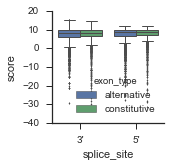

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', context='notebook')

%matplotlib inline

fig, ax = plt.subplots(figsize=(2, 2))
sns.boxplot(hue='exon_type', y='score', data=splice_site_scores_tidy, x='splice_site', 
            linewidth=1, fliersize=2, order=["3'", "5'"])
sns.despine()

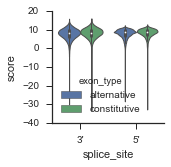

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', context='notebook')

%matplotlib inline

fig, ax = plt.subplots(figsize=(2, 2))
sns.violinplot(hue='exon_type', y='score', data=splice_site_scores_tidy, x='splice_site', 
            linewidth=1, order=["3'", "5'"])
sns.despine()